## Domain Analysis

1.Id: Unique identifier for each player in the match. Useful for tracking individual performance.

2.groupId: Identifier for a team or group of players. This can help analyze team dynamics and group performance.

3.matchId: Unique match identifier. Allows analysis of performance across different matches and can be used to compare stats and trends over time .

4.assists: Number of times a player helped a teammate secure a kill. This metric can shed light on support roles within team.

5.boosts: Number of items used that temporarily increase a player's health or speed. Analyzing boosts can provide insights into resource utilization and decision-taking.

6.damageDealt: Total damage dealt by the player. This is a significant indicator of player aggressiveness and effectiveness in combat situations.

7.DBNOs (downed but not out): Indicates how many opponents the player downed. It measures a player's contribution to combat, even if they didn't secur8)  the kill.

8.headshotKills: Count of kills achieved through headshots. This metric communicates skill level in aiming and can be indicative of a player's shooting precision.

9.heals: Number of healing items used. Analyzing this can provide insights into player survival strategies.

10.killPlace: The placement of the player based on the number of kills. This can indicate the effectiveness and aggression of a player throughout the match.

11.killPoints: Points earned from kills, contributing to the total ranking points. Important for understanding competitive playstyle and the value of kills.

12.kills: Total number of kills. It’s a basic and crucial measure of player performance.

13.killStreaks: The number of consecutive kills without dying. A higher kill streak often indicates a players dominance in combat.

14.longestKill: The longest distance from which a player achieved a kill. It can reveal the player’s sniper skills and strategic positioning.

15.matchDuration: Length of the match. This can be useful for analyzing the correlation between match length and player performance.

16.matchType: The type of match played (solo, duo, squad). Different match types can lead to varying straties and player interactions.

17.maxPlace: Maximum placement achieved in the match. This gives an overall perspective on how well the player perfomed relative to other players.

18.numGroups: Total number of groups in the match. This can help in understanding the competitiveness and complexity of the match.

19.rankPoints: Points accumulated based on the player’s performance, affecting their rank. It’s critical for competitive analysis.

20.revives: Number of teammates revived. Revives can indice the player's role in team support.

21.rideDistance: Distance traveled while in a vehicle. This metric can provide insights into mobility strategies.

22.roadKills: Number of kills achieved while driving a vehicle. This can be an indicator of unconventional combat styles.

23.swimDistance: Distance traveled while swimming. Water mechanics can play a strategic role in certain maps.

24.teamKills: Kills made against teammates. High team kill counts can indicate poor team coordination or accidental kills.

25.vehicleDestroys: Number of enemy vehicles destroyed. Destruction of vehicles can be a strategic tactic, disabling enemy mobility.

26.walkDistance: Distance traveled on foot. This can indicate a player’s engagement with the map and enemies.

27.weaponsAcquired: Number of weapons picked up. Higher numbers can indicate an aggressive beating strategy, which might correlate with kills.

28.winPoints: Points awarded for winning. This metric reflects overall success and performance in competitive settings.

29.winPlacePerc: The player's win placement percentage, indicating how often the player finishes in a certain position (e.g., top 10). It is a crucial metric for assessing the effectiveness of a player's strategies.

# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
data=pd.read_csv('pubg.csv')

In [3]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


1.There are 4446966 rows and 29 columns present in dataset.

2.The data contain object,float and integer type data.

## Basic Opration

In [6]:
data.tail() ## last 5 rows

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
35342,131331ed50ccf8,3022b6c7c6553a,f93090bf7fda56,0,3,532.80,3,1,6,5,...,1,0.0,0.0,0.0,0.0,0.0,1088.00,4.0,0.0,0.6939
35343,240acb9206bb6b,02092cfd7ab55a,e7d6acf956c0c2,0,0,0.00,0,0,0,72,...,0,0.0,0.0,0.0,0.0,0.0,67.81,2.0,1455.0,0.3125
35344,e8e3f48fbc63d8,37fcaffa79dd9f,ce55814cb1f686,1,5,474.90,1,1,3,10,...,0,4801.0,0.0,0.0,0.0,0.0,1673.00,5.0,0.0,1.0000
35345,2d0573b2299b14,a347e16d4908db,75fd2ebe1c0cdb,0,1,0.00,0,0,1,58,...,0,0.0,0.0,0.0,0.0,0.0,100.00,2.0,1430.0,0.5000
35346,85bd8488811247,de04bda94fde7f,415bb071fa0ac1,2,0,66.35,1,0,1,54,...,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.head() ## !

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35347 entries, 0 to 35346
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               35347 non-null  object 
 1   groupId          35347 non-null  object 
 2   matchId          35347 non-null  object 
 3   assists          35347 non-null  int64  
 4   boosts           35347 non-null  int64  
 5   damageDealt      35347 non-null  float64
 6   DBNOs            35347 non-null  int64  
 7   headshotKills    35347 non-null  int64  
 8   heals            35347 non-null  int64  
 9   killPlace        35347 non-null  int64  
 10  killPoints       35347 non-null  int64  
 11  kills            35347 non-null  int64  
 12  killStreaks      35347 non-null  int64  
 13  longestKill      35347 non-null  float64
 14  matchDuration    35347 non-null  int64  
 15  matchType        35347 non-null  object 
 16  maxPlace         35347 non-null  int64  
 17  numGroups   

1.Dataset contain 6 columns of float, 19 columns of int dataset and 4 object datatype column.

2.Total 28 columns present in pubg dataset.

3.Id,Groupid and matchid are helps to maintain the structure and context of dataset which helps in increasing the importance of data.

In [9]:
data.describe().drop('count')

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
mean,0.234108,1.127847,130.453445,0.656180,0.222395,1.377882,47.437831,505.974934,0.923105,0.545902,...,0.163776,609.138562,0.003140,4.428786,0.024359,0.007695,1159.184893,3.679143,608.347592,0.475087
std,0.580911,1.732061,168.529934,1.142614,0.578348,2.670114,27.412510,626.906249,1.536288,0.715722,...,0.464032,1497.034273,0.072669,30.735036,0.168710,0.089308,1181.843855,2.397281,739.771790,0.307448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.800000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,83.080000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.500000,3.000000,0.000000,0.463200
75%,0.000000,2.000000,186.000000,1.000000,0.000000,2.000000,71.000000,1173.000000,1.000000,1.000000,...,0.000000,0.119150,0.000000,0.000000,0.000000,0.000000,1972.000000,5.000000,1495.000000,0.744200
max,9.000000,14.000000,2856.000000,32.000000,9.000000,47.000000,100.000000,2069.000000,24.000000,7.000000,...,8.000000,25930.000000,5.000000,1220.000000,4.000000,2.000000,13530.000000,43.000000,1906.000000,1.000000


1.Count:Missing value is present in only one column named winPlacePerc .

2.Mean:The mean lies betten 2-7 according to columns.

3.Standard Deviation (std): vehicledestroys have highest std so higesht variability is present.

4.Min and Max: The range is present between 0-8 according to columns.

In [10]:
data.isnull()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35342,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35344,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35345,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


Here we can see there is a null values.

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


1.No null data present in 28 columns.

2.Their is 1 null value present in the column named winPlacePerc.

In [14]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [15]:
data.shape

(35346, 29)

In [16]:
%%time
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35346 entries, 0 to 35345
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               35346 non-null  object 
 1   groupId          35346 non-null  object 
 2   matchId          35346 non-null  object 
 3   assists          35346 non-null  int64  
 4   boosts           35346 non-null  int64  
 5   damageDealt      35346 non-null  float64
 6   DBNOs            35346 non-null  int64  
 7   headshotKills    35346 non-null  int64  
 8   heals            35346 non-null  int64  
 9   killPlace        35346 non-null  int64  
 10  killPoints       35346 non-null  int64  
 11  kills            35346 non-null  int64  
 12  killStreaks      35346 non-null  int64  
 13  longestKill      35346 non-null  float64
 14  matchDuration    35346 non-null  int64  
 15  matchType        35346 non-null  object 
 16  maxPlace         35346 non-null  int64  
 17  numGroups        

In [7]:
# Detect Null value in winPlacrpPerc column
data[data['winPlacePerc'].isnull() == True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


### Dropping the ID column as it will be of no use

In [17]:
data.drop(['Id'], axis=1, inplace=True)

In [18]:
data['matchType'].value_counts()

,count
matchType,
squad-fpp,13884
duo-fpp,8045
squad,5003
solo-fpp,4250
duo,2489
solo,1399
normal-squad-fpp,131
crashfpp,59
normal-duo-fpp,44


 So from the above there are many matchtypes with combination of fpp, tpp , solo, duo ,squad,etc.
 So we are generalizing them into only solo, duo and squad.
After that applying LabelEncoding to matchType column

In the context of your PUBG dataset, label encoding would be useful for converting the categorical features (e.g., matchType) into numerical format.

## Exploratory Data Analysis

In [19]:
data1=data.copy()

In [20]:
data1.columns

Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

#### Univariate Analysis

In [21]:
# Discrete Columns
dis_cols_1 = ['assists', 'boosts', 'heals', 'DBNOs', 'headshotKills', 'kills']
dis_cols_2 = ['killStreaks', 'revives', 'roadKills', 'teamKills', 'weaponsAcquired','vehicleDestroys']

def discreteGraph(dis_cols):
    fig = plt.figure(figsize = (20, 15))

    index = 1
    for col in dis_cols:
        plt.subplot(3, 2, index)
        sns.countplot(x=col, data=data1)
        index += 1
    plt.tight_layout()
    plt.show()

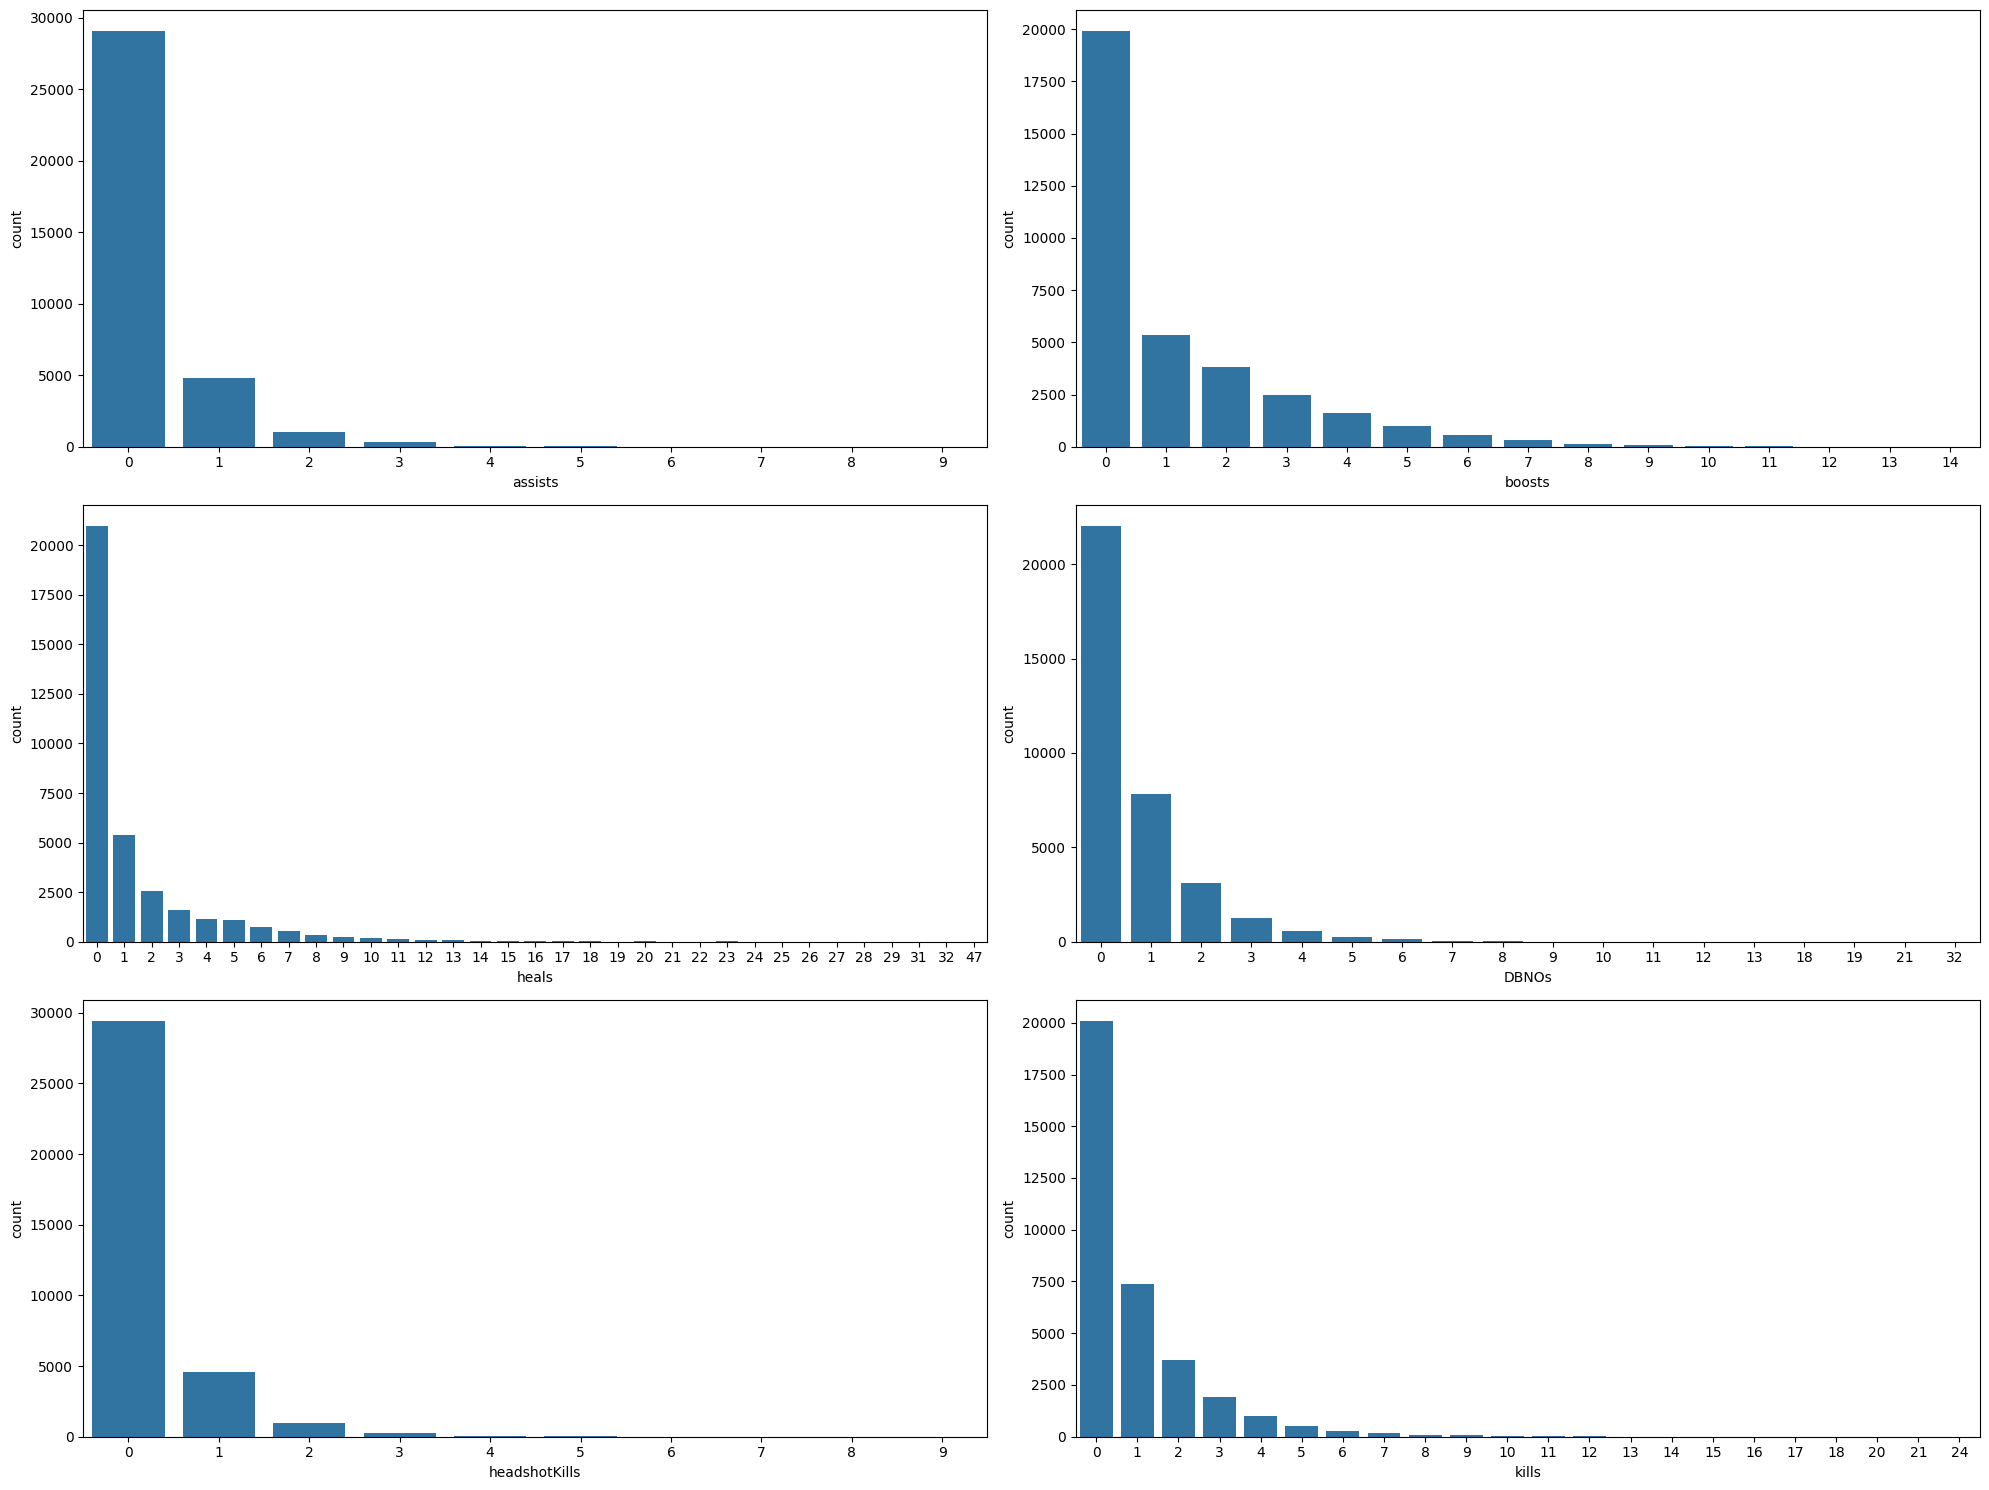

In [22]:
discreteGraph(dis_cols_1)

#### Here from the graph we can see all the above feature have their most of the value lying in the zero region and their higher values graph are somewhat sparse on the basis of count.

### Players Type

In [23]:
players = data1['matchType'].value_counts()
print("Squad Players  : ",players[2])
print("Duo Players  : ",players[0])
print("Solo Players  : ",players[1])
print("Total Players : ",players[0]+players[1]+players[2])


Squad Players  :  5003
Duo Players  :  13884
Solo Players  :  8045
Total Players :  26932


<ipython-input-23-46c19bb6215f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Squad Players  : ",players[2])
<ipython-input-23-46c19bb6215f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Duo Players  : ",players[0])
<ipython-input-23-46c19bb6215f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Solo Players  : ",players[1])
<ipython-input-23-46c19bb6215f>:5: FutureWarning: Series.__getitem__ treating keys

### So here we have the players as above distributed and the data consist of total 3112875 players

## Heatmap

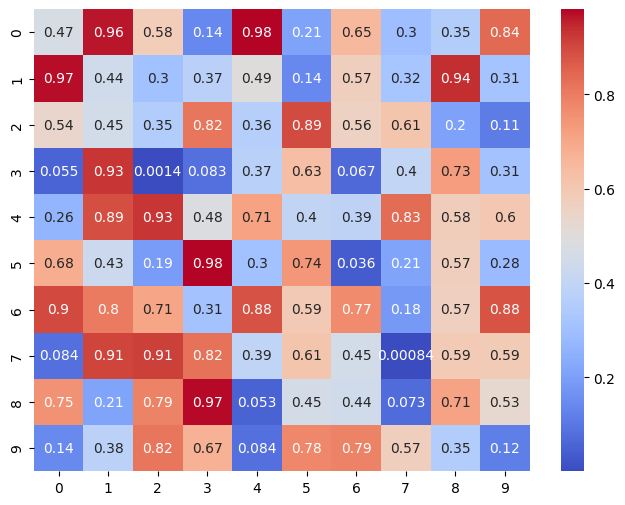

In [24]:
data=np.random.rand(10,10)
plt.figure(figsize=(8,6))
sns.heatmap(data,annot=True,cmap='coolwarm')
plt.show()



1.No value is greater than 0.9 so no need to replacement.
2.So we have groupby the dataset by groupId and applied the aggregrate function to all the features with mean, max, min according to the feature.
Like:
    - Kills : we have taken sum of the kills of team , walkDistance : max,
    - if the columns values are same for all the team players like
    - winPlacePerc, matchType, teamKills, etc we can take mean or max as it will be same for all the players.

    - So basically the feature which desribe any teamwork we will take sum of it ( e.g kils, assists)
    - If its a scaling feature we are taking mean of it
    - If the feature describes quality of player in a team we'll take max of it hence his/her team is affected positively metrics.

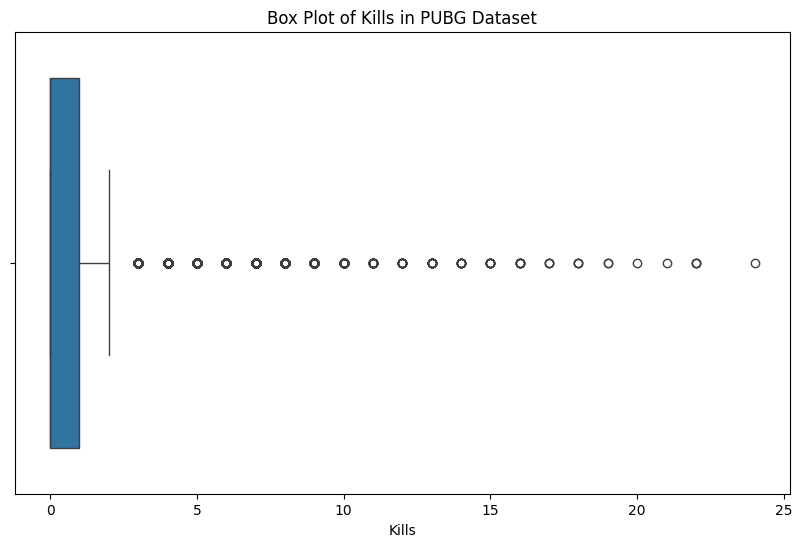

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('pubg.csv')
plt.figure(figsize=(10,6))
sns.boxplot(x=data['kills'])
plt.title('Box Plot of Kills in PUBG Dataset')
plt.xlabel('Kills')
plt.show()

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the price column
Q1 = data['kills'].quantile(0.25)
Q3 = data['kills'].quantile(0.75)
IQR = Q3 - Q1

In [27]:
# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
data_no_outliers = data[(data['kills'] >= lower_bound) & (data['kills'] <= upper_bound)]

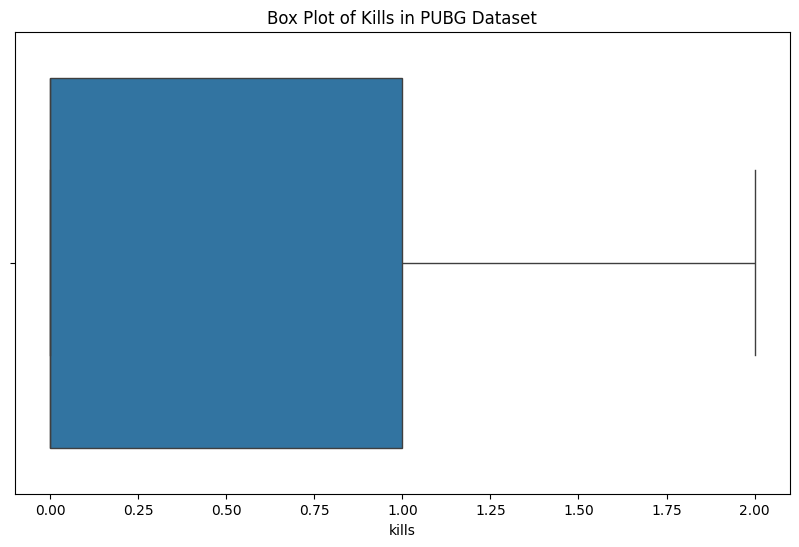

In [29]:
# Box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['kills'])
plt.title('Box Plot of Kills in PUBG Dataset')
plt.xlabel('kills')
plt.show()

 1.Outliers are removed successfully so data of kills comes under normal distribution.

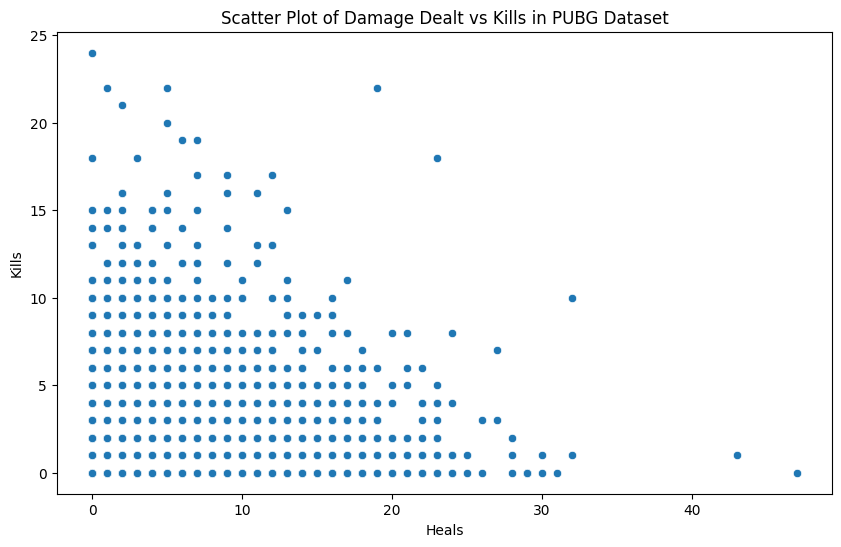

In [30]:
data = pd.read_csv('pubg.csv')
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['heals'], y=data['kills'])
plt.title('Scatter Plot of Damage Dealt vs Kills in PUBG Dataset')
plt.xlabel('Heals')
plt.ylabel('Kills')
plt.show()

1.The chances of more heals are lies in between 0-40.
2.After 40 the chances og getting lower.
3.from 0-40 kills chances is also bigger.

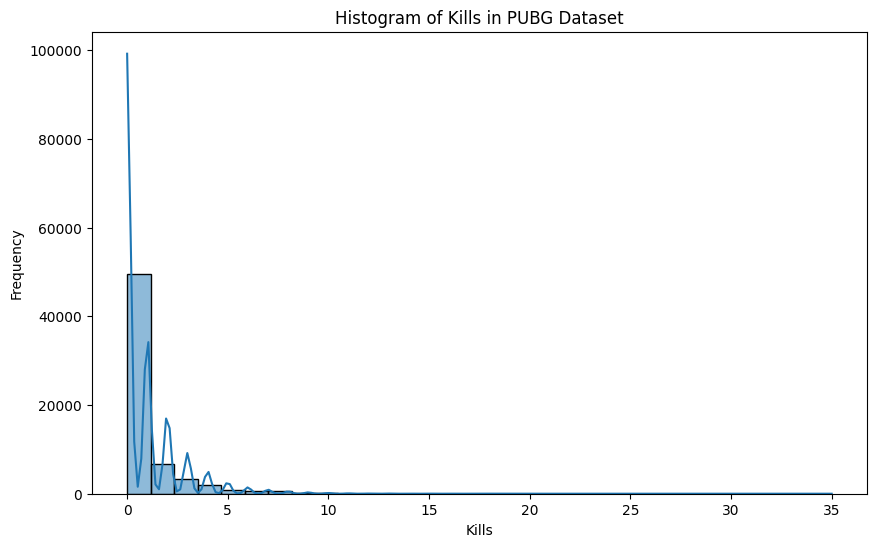

In [31]:
data = pd.read_csv('pubg.csv')
plt.figure(figsize=(10,6))
sns.histplot(data['kills'], bins=30, kde=True)
plt.title('Histogram of Kills in PUBG Dataset')
plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.show()


  The frequency of kills increses at 0 th position.

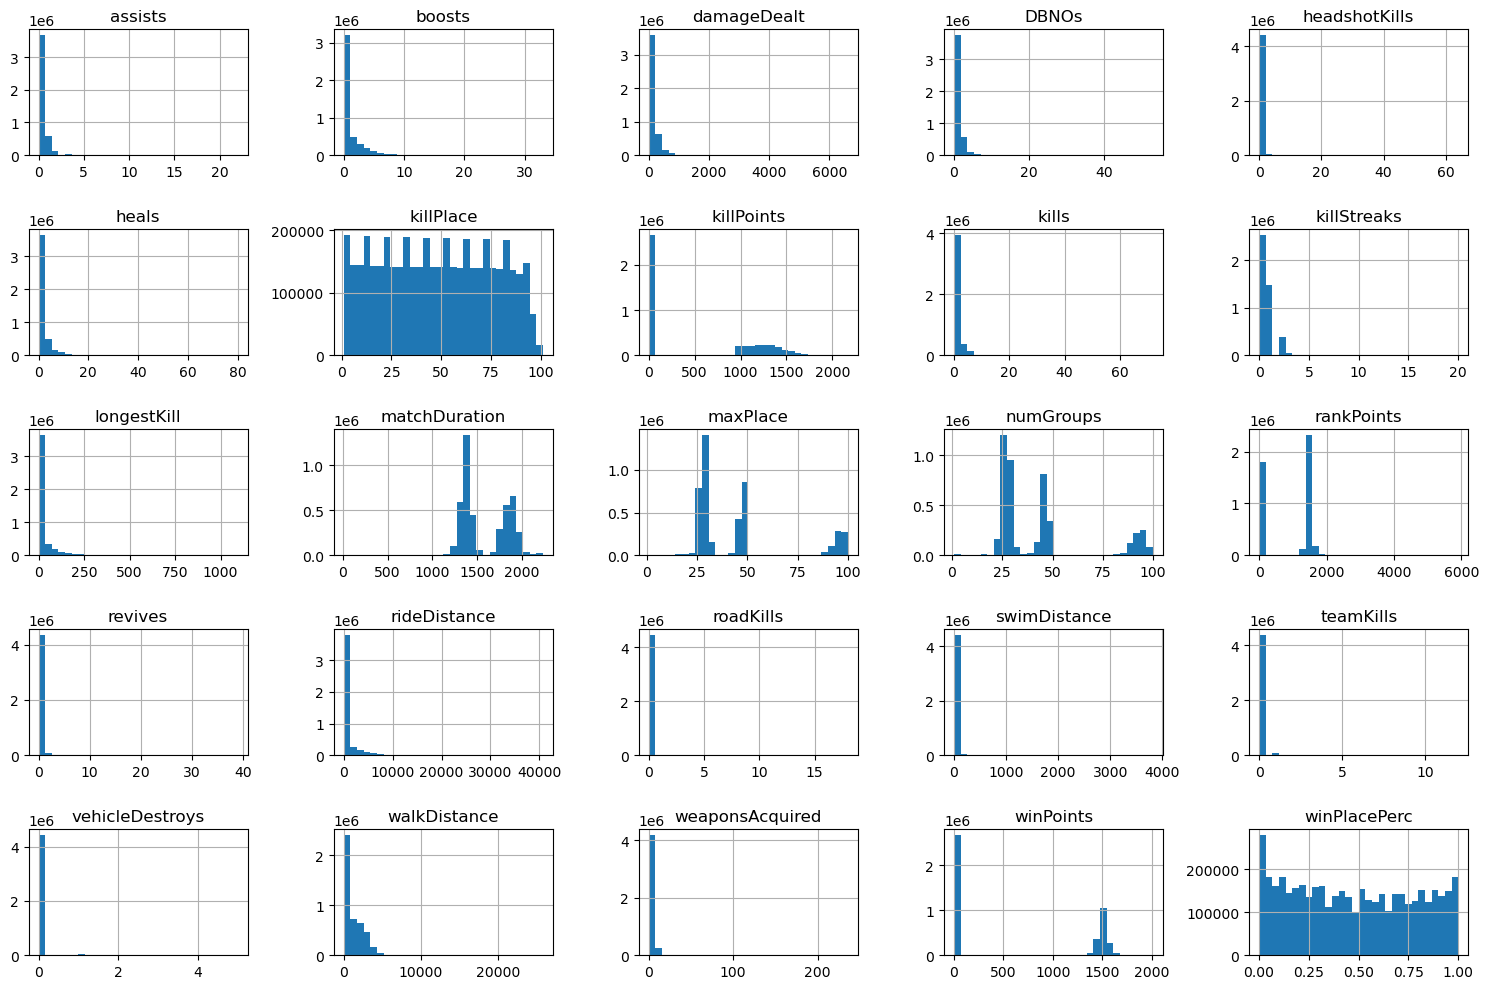

In [4]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

1.No data is in normal distribution.
2.Here from the graph we can see all the above feature have their most of the value lying in the zero region.
3.Their higher values graph are somewhat sparse on the basis of count.

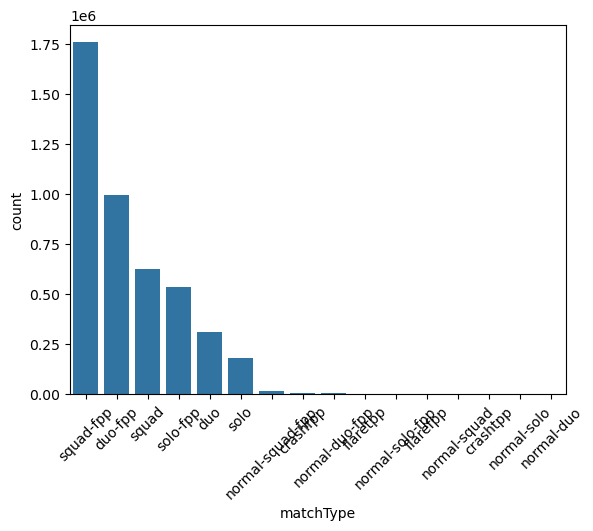

In [5]:
sns.countplot(data=data, x='matchType', order=data['matchType'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

1.3 types of main matches are therre solo,squad,duo
2.win place prediction of solo match is very less around 0.25.

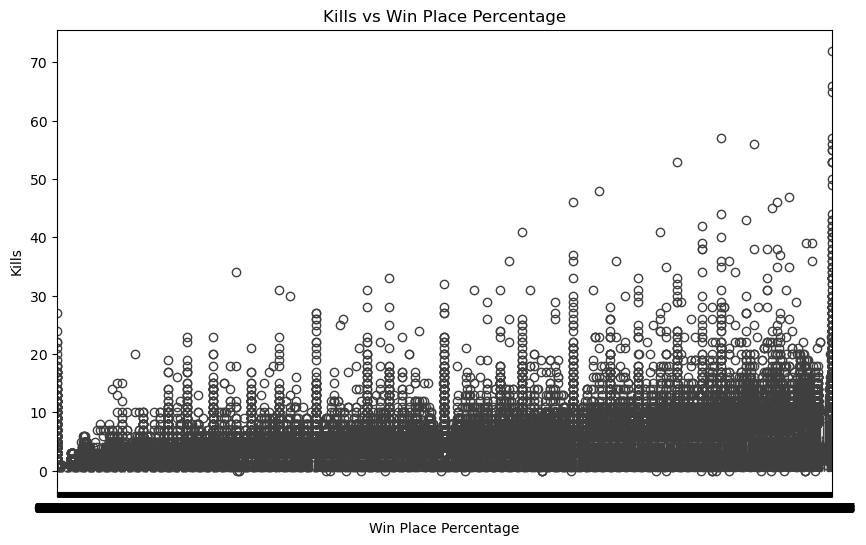

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='winPlacePerc', y='kills', data=data)
plt.title("Kills vs Win Place Percentage")
plt.xlabel("Win Place Percentage")
plt.ylabel("Kills")
plt.show()

1.WinPlace Percentages increases with when kills increases.

## Data Preprocessing

In [32]:
data.columns



Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score



In [34]:
# Load your dataset
data = pd.read_csv('pubg.csv')  # Replace with actual dataset

# Categorical column that needs to be encoded (adjust based on your dataset)
categorical_columns = ['matchType']  # Replace with actual categorical columns

# One-Hot Encoding the categorical columns
one_hot = OneHotEncoder()
encoded_features = one_hot.fit_transform(data[categorical_columns]).toarray()

# Add the encoded features back to the dataset and drop original categorical columns
encoded_df = pd.DataFrame(encoded_features, columns=one_hot.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Define feature matrix (X) and target variable (y)
X = data.drop(['Id', 'groupId', 'matchId', 'winPlacePerc'], axis=1)  # Adjust based on your dataset
y = data['winPlacePerc']  # Adjust based on your dataset

# Handle missing values if necessary
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for models like SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [35]:
# Initialize a dictionary to store model results
model_results = {}

In [36]:
# 1. Linear Regression
print("Applying Linear Regression...")
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
model_results['Linear Regression'] = {'MSE': mse_linear, 'R2': r2_linear}

# 2. Logistic Regression (for binary classification)
print("\nApplying Logistic Regression...")
# Convert target into binary (e.g., winPlacePerc >= 0.5 is 1, else 0)
y_train_binary = (y_train >= 0.5).astype(int)
y_test_binary = (y_test >= 0.5).astype(int)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_binary)
y_pred_logistic = log_reg.predict(X_test)
accuracy_logistic = accuracy_score(y_test_binary, y_pred_logistic)
model_results['Logistic Regression'] = {'Accuracy': accuracy_logistic}

# 3. Random Forest Regressor
print("\nApplying Random Forest Regressor...")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_results['Random Forest Regressor'] = {'MSE': mse_rf, 'R2': r2_rf}

# 4. Random Forest Classifier
print("\nApplying Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_binary)
y_pred_rf_class = rf_classifier.predict(X_test)
accuracy_rf_class = accuracy_score(y_test_binary, y_pred_rf_class)
model_results['Random Forest Classifier'] = {'Accuracy': accuracy_rf_class}

# 5. Decision Tree Regressor
print("\nApplying Decision Tree Regressor...")
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_results['Decision Tree Regressor'] = {'MSE': mse_dt, 'R2': r2_dt}

# 6. Decision Tree Classifier
print("\nApplying Decision Tree Classifier...")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_binary)
y_pred_dt_class = dt_classifier.predict(X_test)
accuracy_dt_class = accuracy_score(y_test_binary, y_pred_dt_class)
model_results['Decision Tree Classifier'] = {'Accuracy': accuracy_dt_class}

# 7. K-Neighbors Regressor
print("\nApplying K-Neighbors Regressor...")
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
model_results['K-Neighbors Regressor'] = {'MSE': mse_knn, 'R2': r2_knn}

# 8. K-Neighbors Classifier
print("\nApplying K-Neighbors Classifier...")
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train_binary)
y_pred_knn_class = knn_classifier.predict(X_test)
accuracy_knn_class = accuracy_score(y_test_binary, y_pred_knn_class)
model_results['K-Neighbors Classifier'] = {'Accuracy': accuracy_knn_class}

# 9. Support Vector Regressor
print("\nApplying Support Vector Regressor...")
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
model_results['Support Vector Regressor'] = {'MSE': mse_svr, 'R2': r2_svr}

# 10. Support Vector Classifier
print("\nApplying Support Vector Classifier...")
svc = SVC()
svc.fit(X_train, y_train_binary)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test_binary, y_pred_svc)
model_results['Support Vector Classifier'] = {'Accuracy': accuracy_svc}

# 11. Naive Bayes Classifier (only for classification)
print("\nApplying Naive Bayes Classifier...")
nb = GaussianNB()
nb.fit(X_train, y_train_binary)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
model_results['Naive Bayes Classifier'] = {'Accuracy': accuracy_nb}

# Printing Model Results
print("\nModel Results:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

# Finding the best model
print("\nBest Model Summary:")
for model_name, metrics in model_results.items():
    if 'MSE' in metrics:
        print(f"Best Regression Model ({model_name}) -> MSE: {metrics['MSE']}, R2: {metrics['R2']}")
    if 'Accuracy' in metrics:
        print(f"Best Classification Model ({model_name}) -> Accuracy: {metrics['Accuracy']}")

Applying Linear Regression...

Applying Logistic Regression...

Applying Random Forest Regressor...

Applying Random Forest Classifier...

Applying Decision Tree Regressor...

Applying Decision Tree Classifier...

Applying K-Neighbors Regressor...

Applying K-Neighbors Classifier...

Applying Support Vector Regressor...

Applying Support Vector Classifier...

Applying Naive Bayes Classifier...

Model Results:

Linear Regression:
MSE: 0.015253472191158877
R2: 0.8382764841884203

Logistic Regression:
Accuracy: 0.9161253143336128

Random Forest Regressor:
MSE: 0.008527008602963643
R2: 0.9095931868269203

Random Forest Classifier:
Accuracy: 0.9343566638725901

Decision Tree Regressor:
MSE: 0.01760190479044426
R2: 0.8133774466549796

Decision Tree Classifier:
Accuracy: 0.9084765297569153

K-Neighbors Regressor:
MSE: 0.015492393601634534
R2: 0.8357433422243774

K-Neighbors Classifier:
Accuracy: 0.9007229673093042

Support Vector Regressor:
MSE: 0.008412035497727361
R2: 0.9108121784486025

Su

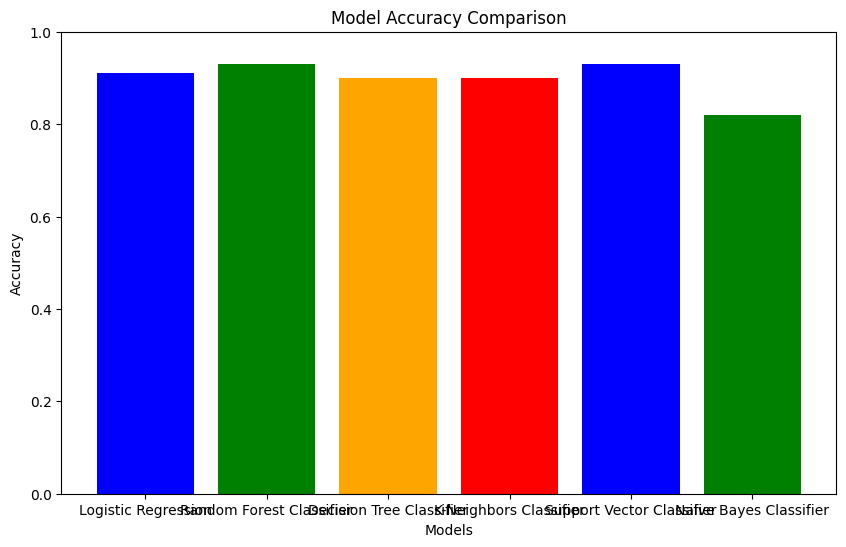

In [41]:
import matplotlib.pyplot as plt

# Example data
models = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier','K-Neighbors Classifier', 'Support Vector Classifier','Naive Bayes Classifier']
accuracies = [0.91, 0.93, 0.90, 0.90,0.93,0.82]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Adding titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Accuracy typically ranges from 0 to 1

# Display the plot
plt.show()

## Support Vector Classifier model gave best performance with an accuracy of 93.48%

## Conclusion

The project demonstrates how different regression models can be applied to solve predictive problems effectively. Based on the results, the chosen model can be deployed in real-world applications to make accurate predictions. The insights from the correlation matrix and model evaluations also helped in refining the model and improving its overall performance.